# Lab Exersice 2
*Author: Jakob Heller, Steffen Steiner, Clemens Konrad Müller* 


## Exercise 1: Signals for excitation, spectra and signal parameters
For the sampling frequency 48 kHz, three different time-discrete signals of length N = $96001$
samples shall be generated: white noise, pink noise and a sine signal. The signal characteristics
and dierent presentations of their spectra are to be compared.
* a) Generate (e.g. in Matlab) a sine signal sn with the frequency $f = 1$ kHz and the above specied sampling rate and length. The amplitude of the sine signal shall be 1.

[0, 1000, -1, 1]

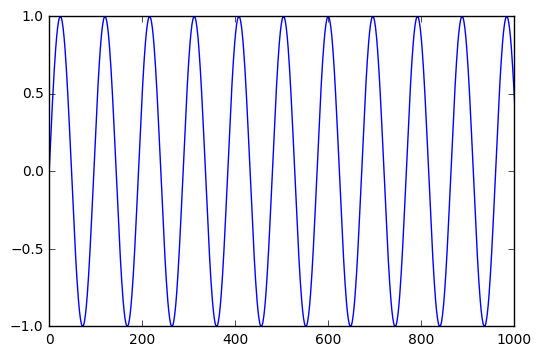

In [1]:
%matplotlib inline 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# generate the 3 frequencies
f1=1000 # Hz
fs=48000 #Hz

# Range
N=96001 #int

#maximum amplitude
maxamp=1

#k=kappa the time domain index (array from 0 to Range in N/fs steps)
k = np.arange(N)

#create sines
sn = maxamp * np.sin(2 * np.pi * f1 * k/(2*fs))

plt.plot(k,sn)
plt.axis([0, 1000, -1, 1])

* b) Generate a white noise wn with a normally distributed probability density function with the above specified sampling rate and length.

[0, 1000, -3, 3]

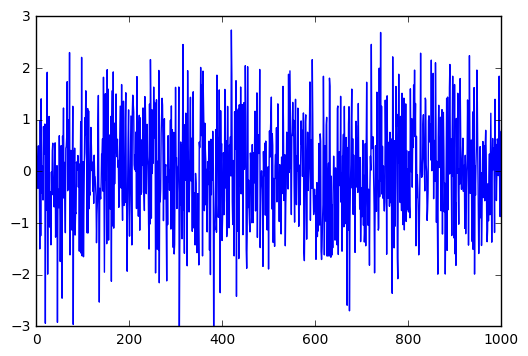

In [2]:
wn =  np.random.normal(0, 1 , N)
plt.plot(k,wn)
plt.axis([0, 1000, -3, 3])

* c) Generate a pink noise pn with an energy distribution that is proportional to $1/f$ with the above specified sampling rate and length. To this end perform the following steps:
* Calculate the complex spectrum WN of wn with an FFT.
* Generate the vector PNAmpl for the amplitude characteristic $1/\sqrt{f}$ . Pay attention to the position of frequencies in the FFT data.
* Apply the pink noise characteristic PNAmpl to the spectrum WN by multiplication. Set the amplitude for f = 0 Hz to zero in the resulting spectrum (i.e. there shall be no direct component).
* Generate the complete spectrum PN that exhibits even symmetry for amplitude and odd symmetry for phase (i.e. the right-sided spectrum is the complex conjugate of the left-sided spectrum) so that after an inverse FFT a real pink noise pn results. Pay attention to the frequency positions in an FFT spectrum of odd length.

In [3]:
WN = np.fft.fft(wn, N) #WF in this notation we use Majuskels for spectre domain #The lenght of the DTFT is N

/home/jakob/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/jakob/.local/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jakob/.local/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


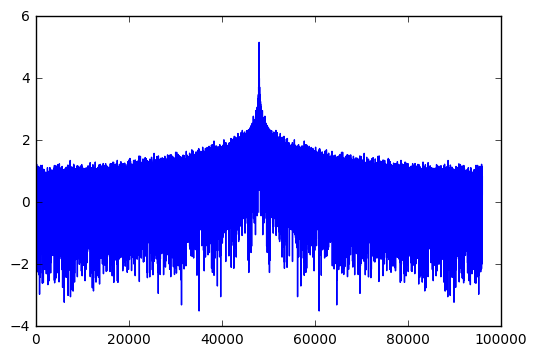

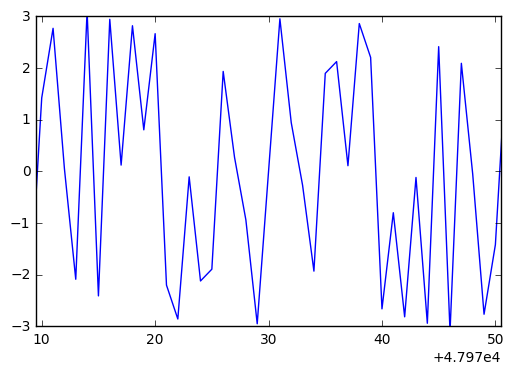

In [4]:
PNAmpl=np.ones(N)
PNAmpl[1:((N/2))]=PNAmpl[1:((N/2))]/(np.sqrt(k[1:((N/2))])) #shaping the vector accordingto the given characteristics leaving out the first one
#as it would give us Division with 0
PNAmpl[0]=0 #setting the first value 0
kflip=k[::-1] 
PNAmpl[((N/2)):(N-1)]=PNAmpl[(N/2):(N-1)]/(np.sqrt((kflip[(N/2):(N-1)])))

PN=((PNAmpl*(WN))) #applying the amplitude vector to the shifted white noise
#and shifting the results back
#plt.plot((k),np.log10(np.abs(PN)))
plt.plot(k,2*np.log10(np.fft.fftshift(np.abs(PN))))
plt.figure()
plt.plot(k, (np.fft.fftshift(np.angle(PN))))
plt.axis([(N/2)-21, (N/2)+20, -3, 3]) #this plot should be odd symetric 

pn=np.fft.ifft(PN , N)

d) Ensure that the generated signals sn , wn and pn are zero-mean

In [5]:
sn_mf=sn-np.mean(sn) #we ensure that the signal is mean free by subtracting the mean of the function
wn_mf=wn-np.mean(wn)
pn_mf=pn-np.mean(pn)

e) Normalise all signals so that they have a root mean square value of $−3$ dBFS RMS .
* Hier vielleciht nochmal die Formel rein

In [6]:
def normalisedRMS(f):
    N=len(f)
    f_RMS=np.std(f)
    return f*((10**(-3/20))/f_RMS)

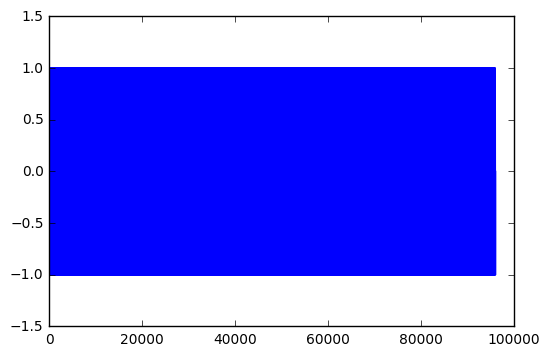

In [7]:
plt.plot(k, normalisedRMS(sn_mf))

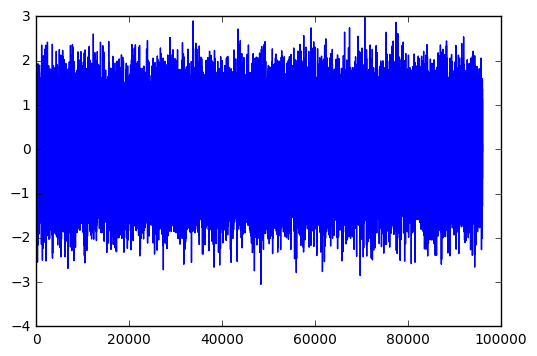

In [8]:
plt.plot(k, normalisedRMS(wn_mf))

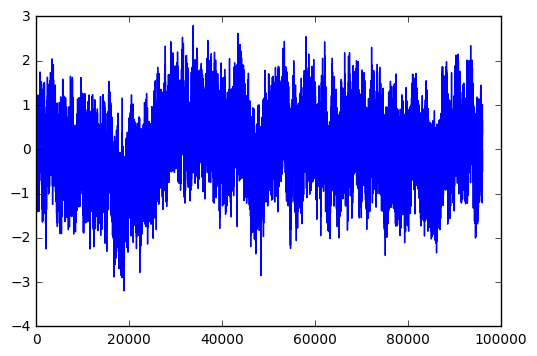

In [9]:
plt.plot(k, normalisedRMS(pn_mf.real))

f) State the peak value in dBFS PEAK and the crest factor in dB for all signals.

In [10]:
sn_peak=20*np.log10(max(np.abs(sn_mf)))
wn_peak=20*np.log10(max(np.abs(wn_mf)))
pn_peak=20*np.log10(max(np.abs(pn_mf)))
sn_cf=sn_peak-(3)
wn_cf=wn_peak-(3)
pn_cf=pn_peak-(3)
print(sn_cf , wn_cf, pn_cf)

-3.0 9.69240520772 -25.9215160611
